## import package

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

## model

In [2]:
df = pd.read_csv('android_traffic.csv', sep=';')

df_copy = df.copy()

df_cleaned = df_copy.drop(columns=['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate'], axis = 1)

x = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, 13].values

encode = OneHotEncoder(handle_unknown='ignore')

x = encode.fit_transform(x).toarray()

label_encode = LabelEncoder()

y = label_encode.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(\
                                                     x,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=50)



## Plot Data

## Scalling Data

## Classifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred)

In [3]:
print(cm)

[[861  60]
 [109 539]]


In [4]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       921
           1       0.90      0.83      0.86       648

    accuracy                           0.89      1569
   macro avg       0.89      0.88      0.89      1569
weighted avg       0.89      0.89      0.89      1569



## visualisasi

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

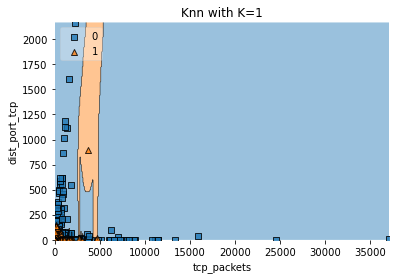

In [8]:
def knn_comparison(data, k):
    x = data[['tcp_packets', 'dist_port_tcp']].values
    y_str = data['type'].values  
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y_str)  
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
   
    plot_decision_regions(x, y, clf=clf, legend=2)
   
    plt.xlabel('tcp_packets')
    plt.ylabel('dist_port_tcp')
    plt.title('Knn with K=' + str(k))
    plt.show()


knn_comparison(df_cleaned, k=1)

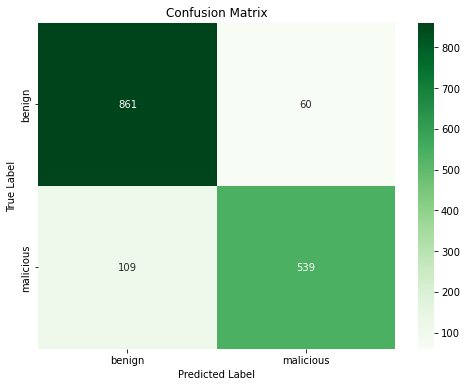

In [7]:
def plot_confusion_matrix(conf_matrix, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt=".2f" if normalize else "d", cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
plot_confusion_matrix(cm, target_names=['benign', 'malicious'], title='Confusion Matrix', cmap='Greens', normalize=False)